# Trie
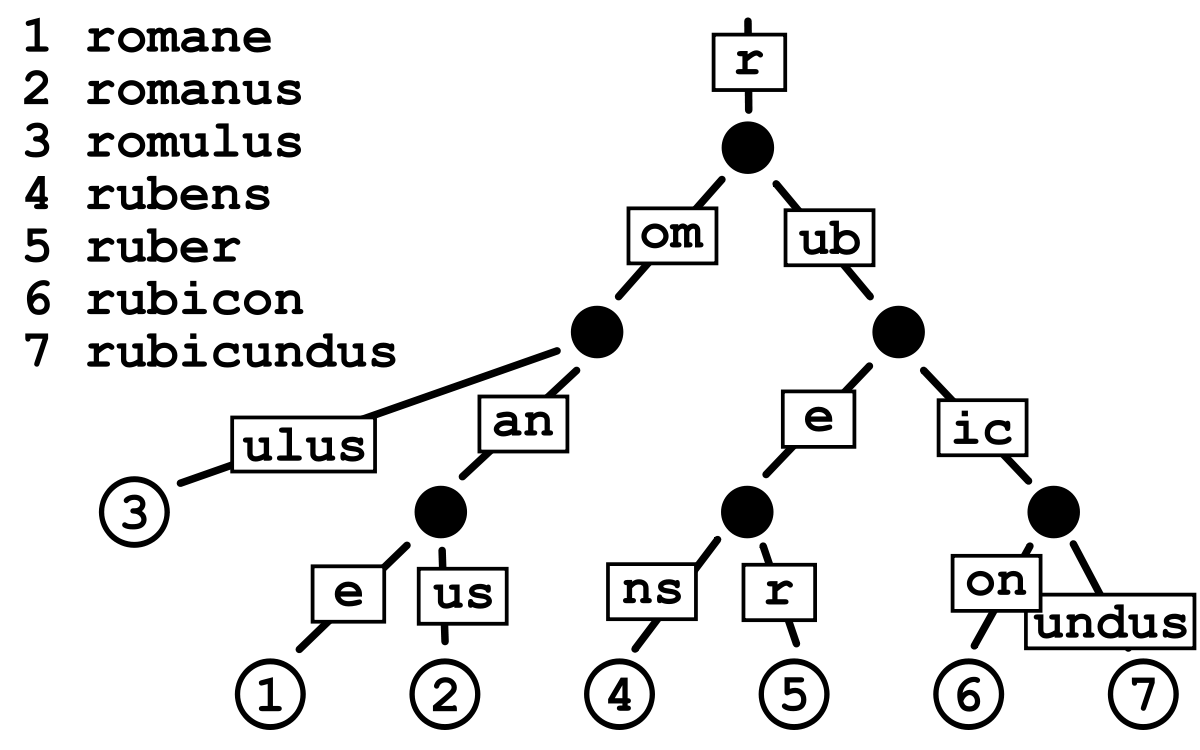

## Properties:
- treelike structure, organizes info in a hierarchy
- typically used to store / search strings in time & space efficient way
- each node can store non-repetitive multiple characters
- each node stores a link to next character in string
- each node keeps track of end of string
- spell check / autocomplete uses trie data structure
    - autocomplete lists next nodes in trie as suggestions
    - spell check looks for the word in the trie and if not there identifies word as a spelling error

## Implementation

In [10]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.end_of_str = False

In [19]:
class Trie:
    def __init__(self):
        self.root = TrieNode()
    
    def insert_string(self, word):
        current = self.root
        for i in word:
            node = current.children.get(i)
            if node is None:
                node = TrieNode()
                current.children.update({i:node})
            current = node
        current.end_of_str = True
    
    def search(self, word):
        current = self.root
        for i in word:
            node = current.children.get(i)
            if node is None:
                return False
            else:
                current = node
        
        if current.end_of_str == True:
            return True
        else:
            return False
    
def delete_string(root, word, index):
    ch = word[index]
    current = root.children.get(ch)
    can_delete = False
    
    if len(current.children) > 1:
        delete_string(current, word, index + 1)
        return False
    
    if index == len(word) - 1:
        if len(current.children) >= 1:
            current.end_of_str = False
            return False
        else:
            root.children.pop(ch)
            return True
    
    if current.end_of_str == True:
        delete_string(current, word, index + 1)
        return False
    
    can_delete = delete_string(current, word, index + 1)
    if can_delete:
        root.children.pop(ch)
        return True
    else:
        return False
        

In [20]:
new_trie = Trie()
new_trie.insert_string("app")
new_trie.insert_string("appl")
delete_string(new_trie.root, "app", 0)
new_trie.search("dog")

False